# Predicting Diabetic Risk on Pregnant Female

*insert explanation on usecase*

# NAIVE BAYES

*insert explanation on naive bayes*
*Naive Bayes - updating beliefs, calculating frequencies*

## Import Libraries

### Standard Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [4]:
from sklearn.naive_bayes import GaussianNB #usually used
from sklearn.preprocessing import StandardScaler #standardized the values, for purely numerical values
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Load and Explore the Dataset

In [5]:
df = pd.read_csv("diabetes.csv")
df.describe(include="all")

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Get column information, to describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant            768 non-null int64
Plasma glucose concentration        768 non-null int64
Diastolic blood pressure (mm Hg)    768 non-null int64
Triceps skin fold thickness (mm)    768 non-null int64
2-Hour serum insulin (mu U/ml)      768 non-null int64
Body mass index                     768 non-null float64
Diabetes pedigree function          768 non-null float64
Age                                 768 non-null int64
Class                               768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Build the Model

In [7]:
#Separate the Features and the Target Variable

X = df.drop(["Class"], axis=1)
y = df["Class"]

In [8]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
#Check shape to make sure it is all in order
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576L,), (192L,))

### Scaling the Dataset

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">**Standard Scaler**</a>

In [10]:
#Instantiate the Standard Scaler
#Very important to scale to the train than vice versa, Do it on the train, Apply on the test

scaler = StandardScaler()

#Fit the scaler to the training set
scaler.fit(X_train)

#Transform the training set
X_train_scaled = scaler.transform(X_train)

#Transform the test set
X_test_scaled = scaler.transform(X_test)

In [11]:
#Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [20]:
X_train_sdf

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age
357,2.803468,0.259779,-3.780779,0.616770,-0.692052,1.039740,0.296085,0.963521
73,0.078327,0.259779,0.897245,-0.032106,1.633077,0.409454,-0.700876,-0.862956
352,-0.224467,-1.858253,0.679662,0.486995,-0.692052,0.317537,-0.665480,1.137471
497,-0.527260,-1.235302,0.135706,-0.356544,-0.037571,-0.247095,0.231195,-0.689006
145,-1.132847,-0.581204,0.298893,0.162557,-0.692052,-4.199517,0.304934,-1.036906
514,-0.224467,-0.674647,-0.843416,-0.096993,0.048545,-0.837988,-0.927994,-0.775981
291,-1.132847,-0.425467,-0.408251,0.616770,-0.054794,0.606418,0.850608,-0.689006
132,-0.224467,1.536828,-0.299459,1.070984,1.245555,0.330668,-0.332177,-0.254130
559,2.197881,-1.110712,0.244497,-1.329858,-0.692052,-0.247095,-0.497354,0.180745
631,-1.132847,-0.581204,0.462080,1.265647,0.082991,0.330668,-0.680228,-0.775981


### Train the Model

<a href="https://scikit-learn.org/stable/modules/naive_bayes.html">**Naive Bayes**</a>

In [12]:
#Instantiate the Algorithm , best models are usually  combined, used for certain models (simple models)
#Test on simple models, see the models  and the result is its baseline, 
gnb = GaussianNB() #priors- prior probabilities 

#Train the model
gnb.fit(X_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Validate the Model

In [13]:
#Predict on the Test Set
#SK Learn - putting in a dataframe, usually binary
y_pred = gnb.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [14]:
#Check performance metrics, accuracy scores, everything it has done
print(accuracy_score(y_test,y_pred))

0.734375


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

   micro avg       0.73      0.73      0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192



In [16]:
print (confusion_matrix(y_test, y_pred))

[[94 29]
 [22 47]]


Text(0.5,23.5,'Predicted label')

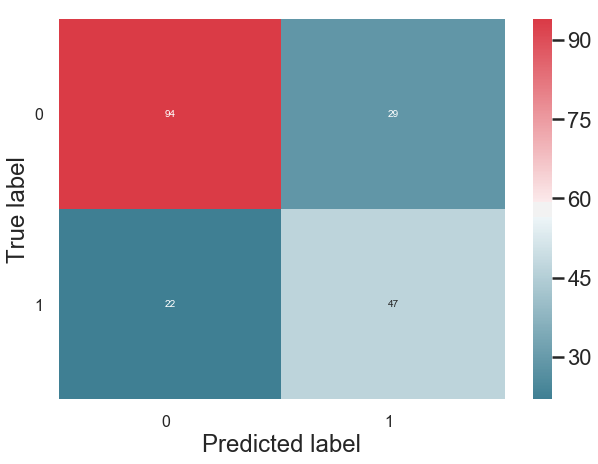

In [17]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Create Report

In [18]:
#View original test dataset with results for easier analysis
df_results = X_test.copy()
df_results['Class'] = y_test
df_results['Predicted'] = y_pred

In [19]:
df_results.head(10)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class,Predicted
668,6,98,58,33,190,34.0,0.430,43,0,0
324,2,112,75,32,0,35.7,0.148,21,0,0
624,2,108,64,0,0,30.8,0.158,21,0,0
690,8,107,80,0,0,24.6,0.856,34,0,0
473,7,136,90,0,0,29.9,0.210,50,0,1
204,6,103,72,32,190,37.7,0.324,55,0,1
97,1,71,48,18,76,20.4,0.323,22,0,0
336,0,117,0,0,0,33.8,0.932,44,0,1
568,4,154,72,29,126,31.3,0.338,37,0,0
148,5,147,78,0,0,33.7,0.218,65,0,1


In [21]:
gnb.predict_proba(X_test_sdf)

array([[7.31268266e-01, 2.68731734e-01],
       [9.41189073e-01, 5.88109271e-02],
       [9.73056134e-01, 2.69438657e-02],
       [8.37318711e-01, 1.62681289e-01],
       [4.62010869e-01, 5.37989131e-01],
       [4.64869141e-01, 5.35130859e-01],
       [9.95879217e-01, 4.12078333e-03],
       [4.88266018e-01, 5.11733982e-01],
       [5.43408750e-01, 4.56591250e-01],
       [2.23865845e-01, 7.76134155e-01],
       [7.35115243e-01, 2.64884757e-01],
       [2.08883978e-02, 9.79111602e-01],
       [3.45812611e-01, 6.54187389e-01],
       [7.34413043e-01, 2.65586957e-01],
       [9.77827561e-01, 2.21724390e-02],
       [6.88353549e-01, 3.11646451e-01],
       [9.44076525e-01, 5.59234745e-02],
       [9.71474702e-01, 2.85252978e-02],
       [1.20139071e-01, 8.79860929e-01],
       [7.13847875e-01, 2.86152125e-01],
       [8.72918354e-01, 1.27081646e-01],
       [9.63527315e-01, 3.64726846e-02],
       [1.00771116e-01, 8.99228884e-01],
       [9.74768711e-01, 2.52312886e-02],
       [3.442639